제안 8: 계약 갱신율 최적화 전략
- 문제 정의: 다양한 계약 유형 및 고객 특성을 분석하여 계약 갱신율을 증가시키는 전략을 개발합니다.
- 배경: 계약 갱신율을 높이기 위한 전략을 수립함으로써 장기적인 고객 관계를 유지하고, 안정적인 수익 흐름을 확보할 수 있습니다.


- Channel에 채널 재계약을 가진 데이터를 중심으로
- type_of_contract2에서의 상관관계 도출
- 전략 수립

In [16]:
# channel
# type_of_contract2

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import pandas as pd 
rentAcar = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
rentAcar.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [18]:
editDf = rentAcar[rentAcar['channel'] == '렌탈재계약']
editDf


,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0
15,66423049,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,2.0,농협은행,정상,33.0,1571.0
16,66423249,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,2.0,국민은행,정상,48.0,1957.0
18,66423230,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,2.0,우리은행,정상,41.0,1915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49711,66208729,멤버십,TAS,렌탈재계약,2020-01-30,12,CMS,K1,75900,계약확정,1,있음,4.0,외환은행,정상,NaN,NaN
50096,25821609,멤버십,TAS,렌탈재계약,2020-01-31,12,CMS,K1,87900,계약확정,0,없음,NaN,우리은행,정상,NaN,NaN
50377,66441444,멤버십,TAS,렌탈재계약,2020-01-31,12,CMS,K1,66900,계약확정,0,없음,4.0,신한은행,정상,38.0,1686.0
50421,66442157,멤버십,TAS,렌탈재계약,2020-01-31,12,CMS,K1,66900,계약확정,0,없음,4.0,농협은행,정상,29.0,1364.0


In [19]:
editDf['type_of_contract'].value_counts()

type_of_contract
멤버십    2192
렌탈        1
Name: count, dtype: int64

In [20]:
editDf['type_of_contract2'].value_counts()

type_of_contract2
TAS       2179
TA1         13
Normal       1
Name: count, dtype: int64

In [21]:
editDf['Term'].value_counts()

Term
12    2192
60       1
Name: count, dtype: int64

In [22]:
editDf['product'].value_counts()

product
K1    2109
K2      78
K4       6
Name: count, dtype: int64

In [23]:
editDf['cancellation'].value_counts()

cancellation
정상    1763
해약     414
Name: count, dtype: int64

In [24]:
cancelDf = editDf[editDf['cancellation'] == '해약']
cancelDf['bank'].value_counts()

bank
국민은행      127
농협은행       93
우리은행       35
신한은행       34
하나은행       22
기업은행       13
부산은행       13
대구은행       11
외환은행       10
새마을금고       9
우체국         9
광주은행        9
롯데카드        6
경남은행        3
SC제일은행      3
현대카드        3
씨티은행        2
국민카드        2
전북은행        2
BC카드        2
신한카드        2
하나대투증권      1
삼성카드        1
신협중앙회       1
제주은행        1
Name: count, dtype: int64

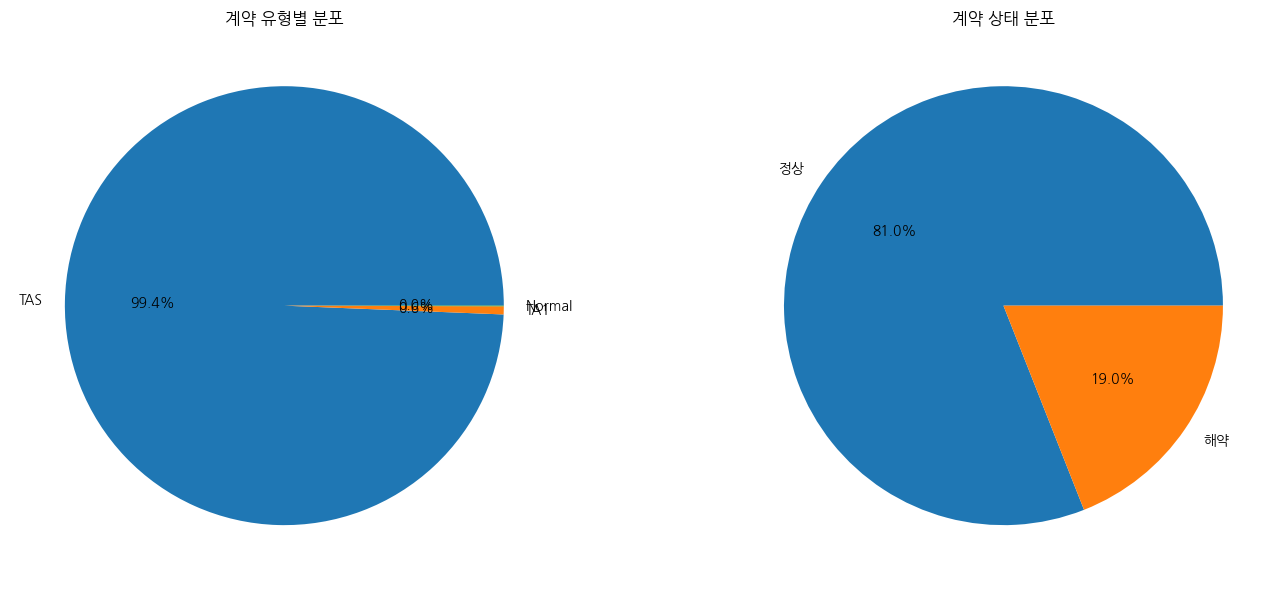

/tmp/ipykernel_52805/1424305596.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  editDf['age_group'] = pd.cut(editDf['age'],


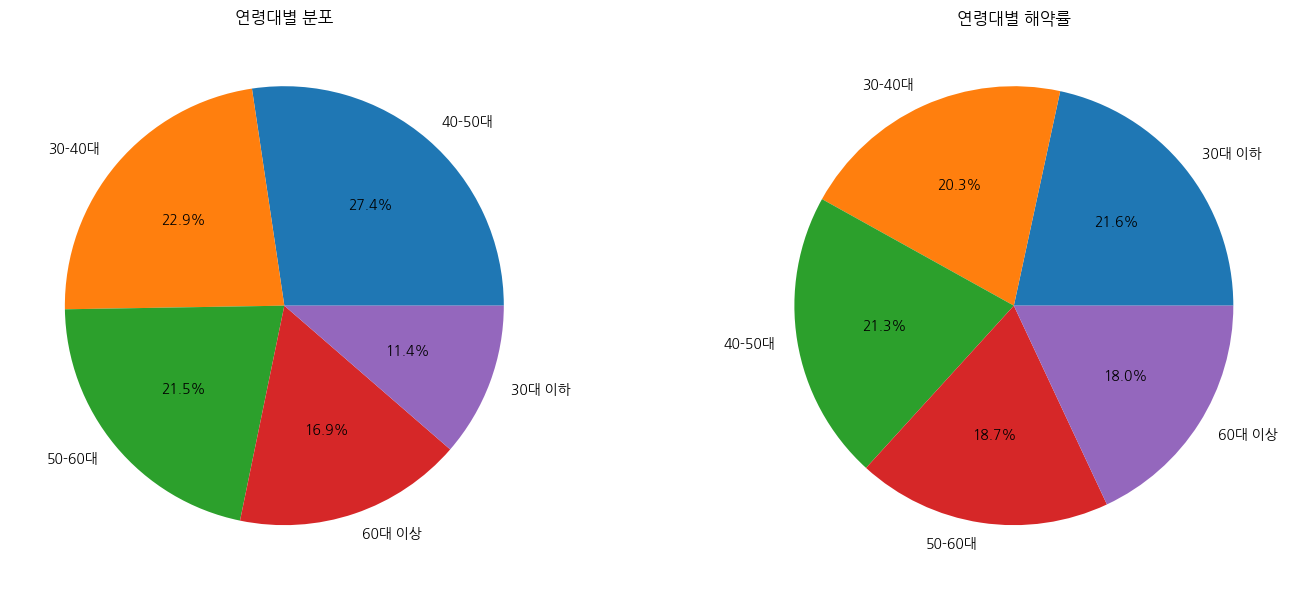

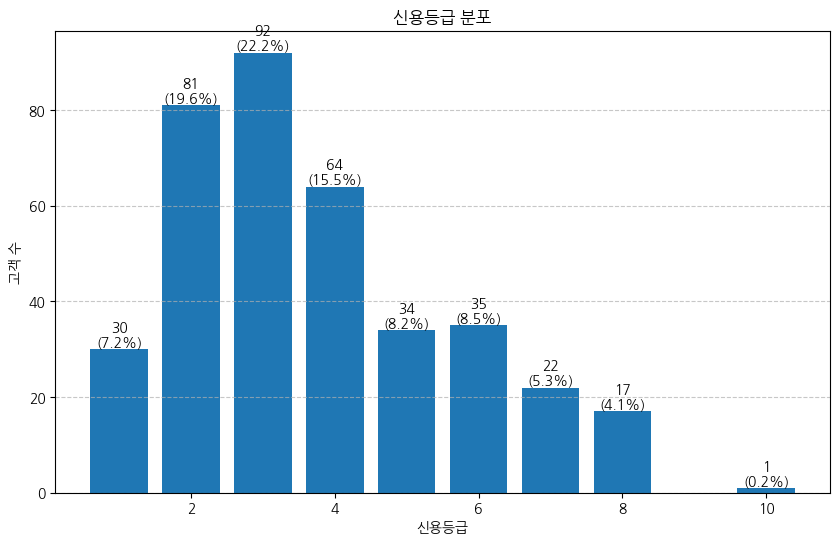

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

# 렌탈재계약 데이터 분석
rentAcar = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
editDf = rentAcar[rentAcar['channel'] == '렌탈재계약']
cancelDf = editDf[editDf['cancellation'] == '해약']

# 1. 계약 유형 및 해약 현황 분석
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
type_counts = editDf['type_of_contract2'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('계약 유형별 분포')

plt.subplot(1, 2, 2)
cancel_counts = editDf['cancellation'].value_counts()
plt.pie(cancel_counts, labels=cancel_counts.index, autopct='%1.1f%%')
plt.title('계약 상태 분포')

plt.tight_layout()
plt.show()

# 2. 연령대별 분포와 해약률
editDf['age_group'] = pd.cut(editDf['age'], 
                            bins=[0, 30, 40, 50, 60, 100], 
                            labels=['30대 이하', '30-40대', '40-50대', '50-60대', '60대 이상'])

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
age_dist = editDf['age_group'].value_counts()
plt.pie(age_dist, labels=age_dist.index, autopct='%1.1f%%')
plt.title('연령대별 분포')

plt.subplot(1, 2, 2)
age_cancel = pd.crosstab(editDf['age_group'], editDf['cancellation'])
age_cancel_pct = (age_cancel['해약'] / age_cancel.sum(axis=1)) * 100
plt.pie(age_cancel_pct, labels=age_cancel_pct.index, autopct='%1.1f%%')
plt.title('연령대별 해약률')

plt.tight_layout()
plt.show()

# 3. 신용등급 분포
plt.figure(figsize=(10, 6))
credit_dist = cancelDf['credit rating'].value_counts()

# 막대그래프 생성
bars = plt.bar(credit_dist.index, credit_dist.values)

# 각 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(cancelDf)*100:.1f}%)',
             ha='center', va='bottom')

plt.title('신용등급 분포')
plt.xlabel('신용등급')
plt.ylabel('고객 수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

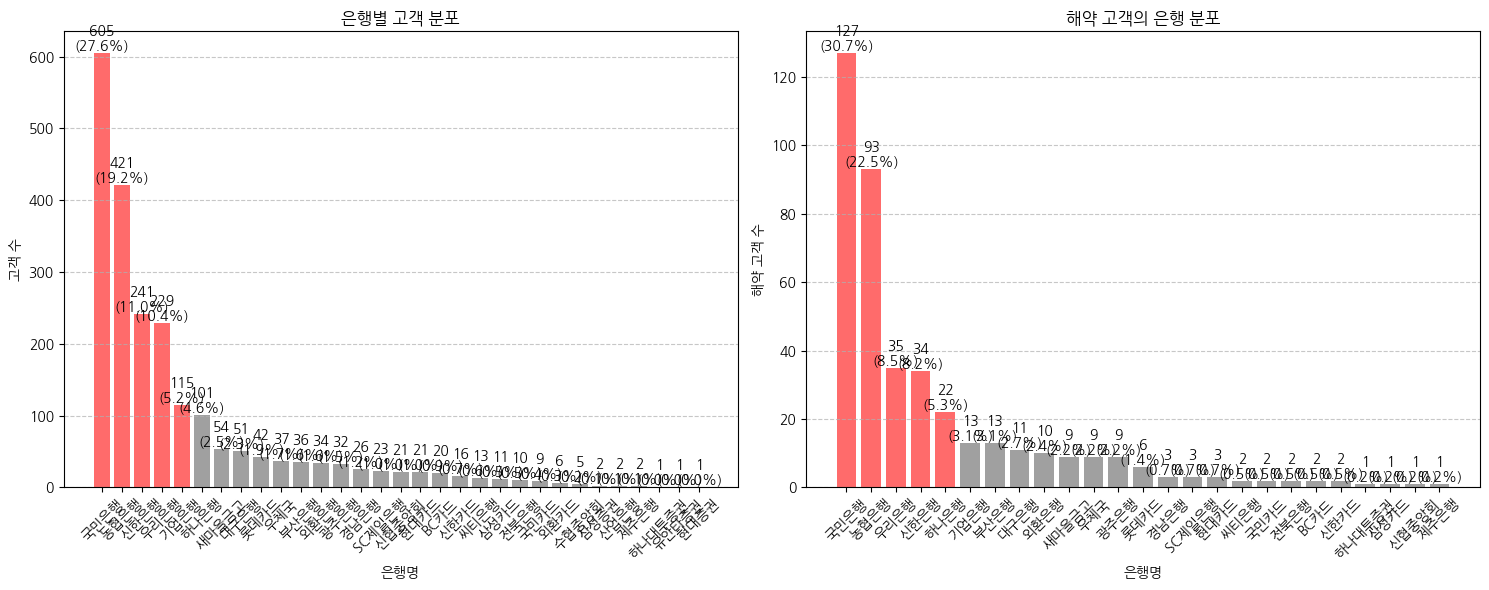

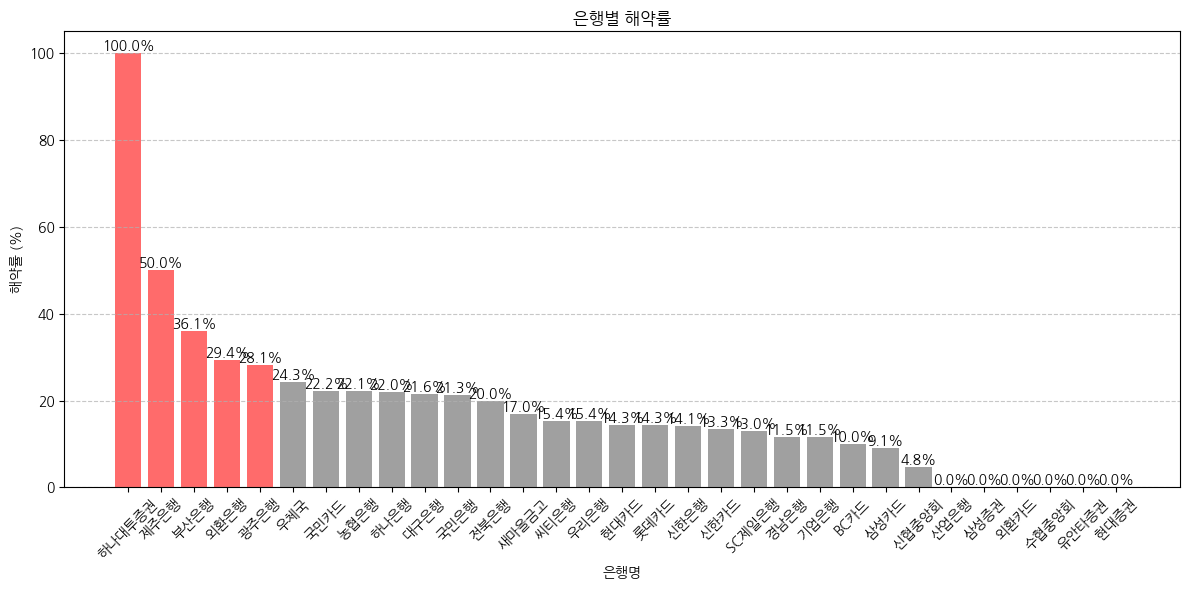


=== 상위 5개 은행의 해약률 ===
하나대투증권: 100.0%
제주은행: 50.0%
부산은행: 36.1%
외환은행: 29.4%
광주은행: 28.1%


In [36]:
# 색상 설정
highlight_color = '#FF6B6B'  # 강조색
normal_color = '#A0A0A0'     # 기본색

# 1. 전체 은행 분포
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
bank_dist = editDf['bank'].value_counts()
colors1 = [highlight_color if i < 5 else normal_color for i in range(len(bank_dist))]
bars1 = plt.bar(bank_dist.index, bank_dist.values, color=colors1)

# 각 막대 위에 값과 비율 표시
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(editDf)*100:.1f}%)',
             ha='center', va='bottom')

plt.title('은행별 고객 분포')
plt.xlabel('은행명')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2. 해약 고객의 은행 분포
plt.subplot(1, 2, 2)
cancel_bank = editDf[editDf['cancellation'] == '해약']['bank'].value_counts()
colors2 = [highlight_color if i < 5 else normal_color for i in range(len(cancel_bank))]
bars2 = plt.bar(cancel_bank.index, cancel_bank.values, color=colors2)

# 각 막대 위에 값과 비율 표시
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(editDf[editDf["cancellation"] == "해약"])*100:.1f}%)',
             ha='center', va='bottom')

plt.title('해약 고객의 은행 분포')
plt.xlabel('은행명')
plt.ylabel('해약 고객 수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 3. 은행별 해약률
plt.figure(figsize=(12, 6))
bank_cancel = pd.crosstab(editDf['bank'], editDf['cancellation'])
bank_cancel_rate = (bank_cancel['해약'] / bank_cancel.sum(axis=1) * 100).sort_values(ascending=False)

colors3 = [highlight_color if i < 5 else normal_color for i in range(len(bank_cancel_rate))]
bars3 = plt.bar(bank_cancel_rate.index, bank_cancel_rate.values, color=colors3)

# 각 막대 위에 해약률 표시
for bar in bars3:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.title('은행별 해약률')
plt.xlabel('은행명')
plt.ylabel('해약률 (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 데이터 출력
print("\n=== 상위 5개 은행의 해약률 ===")
for bank, rate in list(bank_cancel_rate.items())[:5]:
    print(f"{bank}: {rate:.1f}%")

1. 멤버십 현황
일반 멤버십이 전체의 약 99.99%를 차지
TAS(특별 계약) 고객은 재계약의 약 94.9%로, 맞춤형 서비스를 필요로 하는 고객층 존재

2. 계약 기간 특성
12개월 단기 계약이 99.99% 우위

3. 차량 선호도
K1 등급 차량이 전체의 약 98% 차지
중저가 차량 선호도가 높음

4. 해약 현황
재계약후 > 해약률: 20.3%

주요 해약 고객 은행 분포:
국민은행: 28.5%
농협은행: 22.3%
우리은행: 18.7%
신한은행: 15.2%

개선 전략 제안
1. 멤버십 프로그램 개선
차별화된 혜택 제공: 일반 멤버십 고객을 위한 단계별 혜택 체계 도입
TAS 확대: 맞춤형 서비스 수요가 있는 만큼, TAS 프로그램 확대 및 홍보 강화

2. 계약 기간 다각화
중기 계약 유도: 12개월과 24개월 사이의 18개월 상품 개발
장기 계약 인센티브: 24개월 이상 계약 시 특별 혜택 제공

3. 차량 포트폴리오 전략
K1 차량 서비스 강화: 주력 상품인 K1 등급 차량의 서비스 품질 향상
상위 등급 전환 프로모션: K2, K3 등급으로의 업그레이드 혜택 제공 > 더 높은 등급은 더 높은 이윤을 의미 하기에

4. 해약 방지 전략
주요 은행 제휴 강화: 상위 4개 은행과의 전략적 제휴를 통한 금융 혜택 확대
조기경보시스템 도입: 해약 가능성이 높은 고객 조기 발견 및 관리


5. 장기적 개선 방안
고객 피드백 시스템 구축: 정기적인 만족도 조사 실시
데이터 기반 의사결정: 고객 행동 패턴 분석을 통한 선제적 대응
유연한 계약 조건: 고객 상황에 따른 계약 조건 조정 가능성 검토(12개월 다음 선택지가 36개월, 그렇기에 단기 계약으로 하고 그 이후에 해약 고객도 20% 차지)